In [1]:
library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [2]:
###MAKE SURE  TO RUN helperQ9-11 BEFORE RUNNING THIS NOTEBOOK

In [8]:
#edgelistFile<-"movie_edgelist.txt"
edgelistFile<-"imdb_edgelist.txt"

In [9]:
g <- read.graph(edgelistFile,directed = FALSE, format=c("ncol"), weights='yes')

In [6]:
fg1 <- fastgreedy.community(g)

In [1]:
i<-1
con = file("moviemap.txt", "r")
moviemap<-list()
lines <- readLines(con)
for (i in 1:length(lines)){
    c<-unlist(strsplit(lines[i],"\t"))
    #print(c[[1]])
    #print(c[[2]])
    moviemap[[c[[1]]]]<-c[[2]]
}
  close(con)

In [15]:
ratings = read.table("movie_rating_modified.txt",sep="\t")

In [35]:
print(moviemap[["84869"]])
print(moviemap[["86485"]])
print(moviemap[["191381"]])

[1] "BatmanvSuperman:DawnofJustice(2016)"
[1] "Mission:Impossible-RogueNation(2015)"
[1] "Minions(2015)"


In [34]:
print(subset(ratings,V1=="BatmanvSuperman:DawnofJustice(2016)")$V2)
print(subset(ratings,V1=="Mission:Impossible-RogueNation(2015)")$V2)
print(subset(ratings,V1=="Minions(2015)")$V2)

191381 
191319

In [41]:
nodes<-c("84869","86485","191381")
final_list<-list()
j<-1
for(nn in 1:3){
    nl<-neighbors(g,nodes[[nn]])
    i<-1
    ratings_list<-list()
    for(n in nl){
        #if(i>10)
        #  break
        nm<-vertex_attr(g, index =n)$name
        moviename<-moviemap[[nm]]
        r<-subset(ratings,V1==moviename)$V2
        ratings_list[[i]]<-r
        i<-i+1
    }
    final_list[[j]]<-ratings_list
    j<-j+1
}


[1] 6.345086


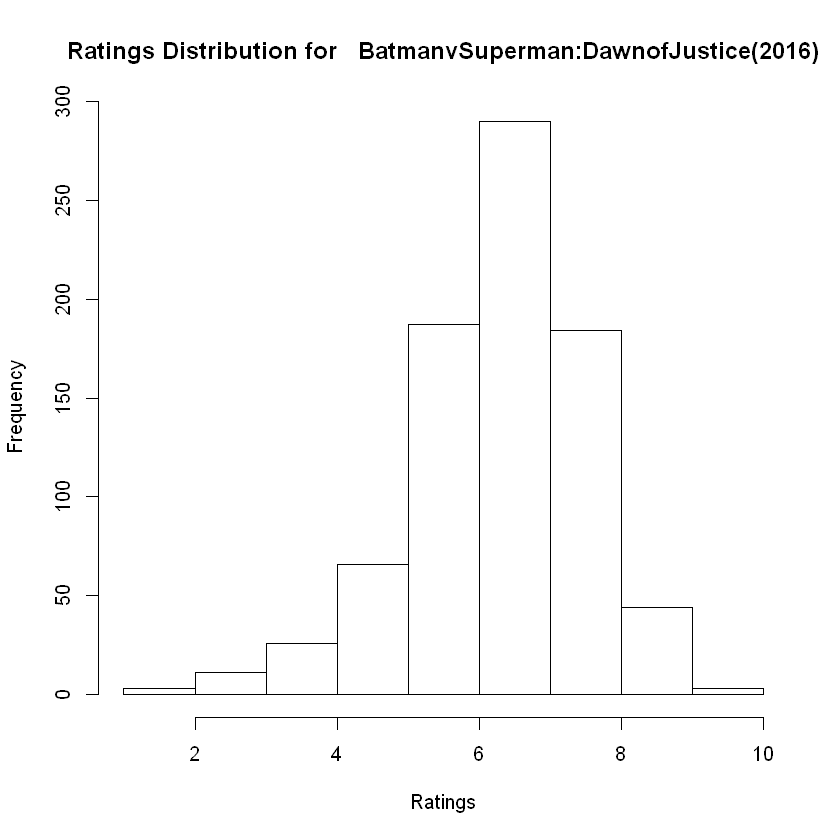

[1] 6.246562


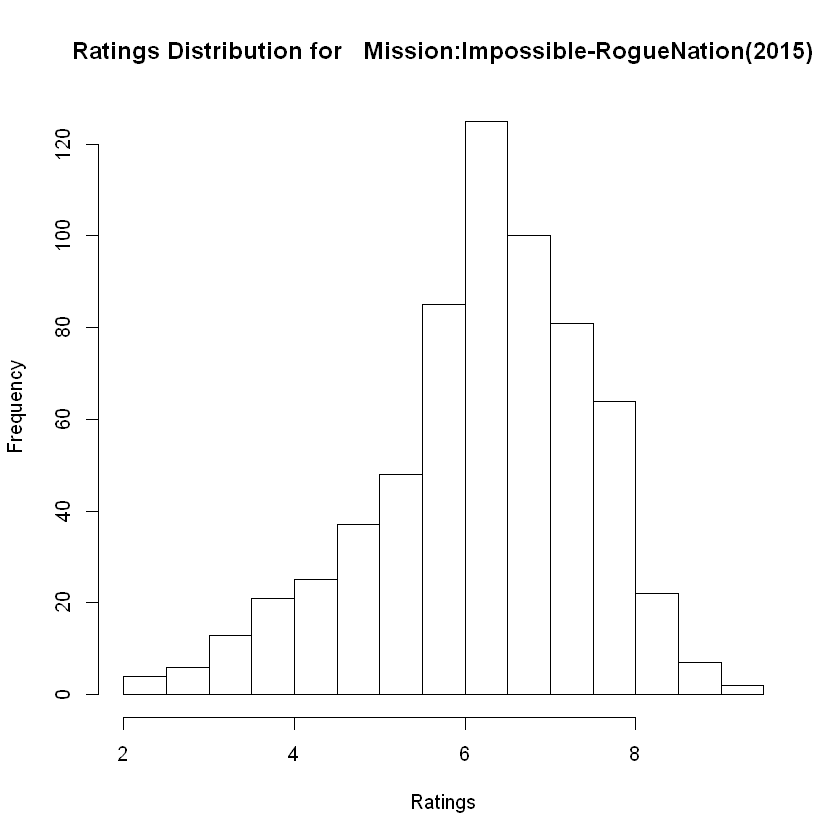

[1] 6.794501


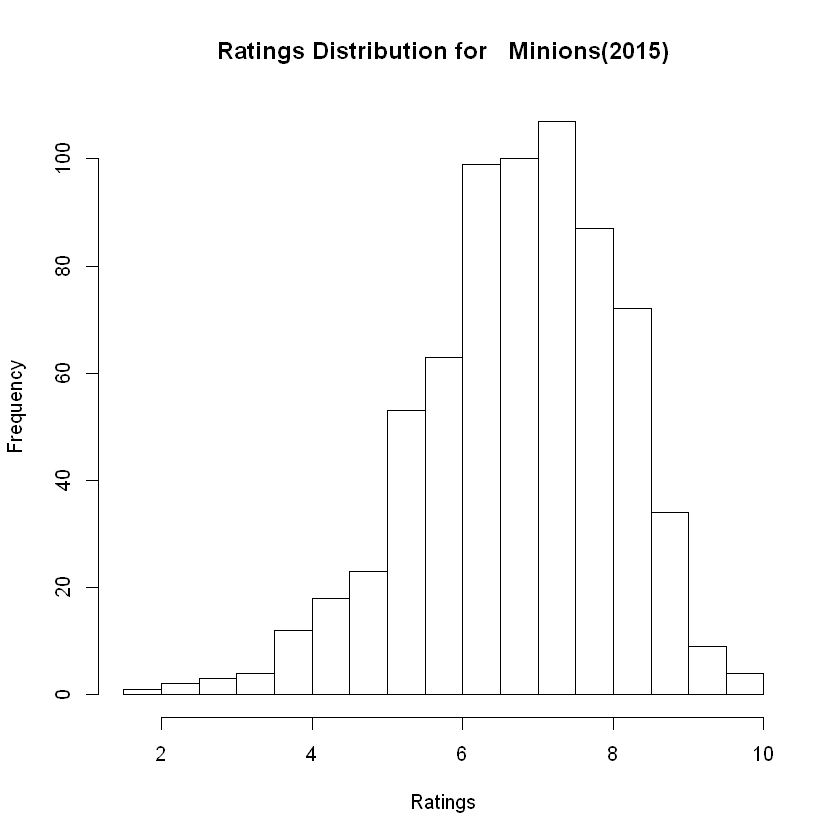

In [45]:
movie<-c("BatmanvSuperman:DawnofJustice(2016)","Mission:Impossible-RogueNation(2015)","Minions(2015)")
for(j in 1:3){
    tit1 <- paste("Ratings Distribution for  ",movie[[j]])
    hist(unlist(final_list[[j]]),xlab="Ratings",ylab="Frequency",main=tit1)
    print(mean(unlist(final_list[[j]])))
}

In [46]:
save(g, file = "g.RData")

In [47]:
save(moviemap,file="moviemap.RData")

In [2]:
save(fg1,file="fg1.RData")